# Simple Deterministic Agent

The agent has a number multiple thresholds according to - say - the number of infectious cases.

## Setup

In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl

## Simulation

In [15]:
env = virl.Epidemic(stochastic=False, noisy=False)
"""
Args:
    stochastic (bool): Is the infection rate sampled from some distribution at the beginning of each episode (default: False)?
    noisy (bool): Is the state a noisy estimate of the true state (default: False)?
    problem_id (int): Deterministic parameterization of the epidemic (default: 0).
"""

states = []
rewards = []

# Required to compute the goodness of a policy

discount = 0.9

# We only consider the state of this simulation
for action in range(env.action_space.n):
    env = virl.Epidemic(stochastic=False, noisy=False)
    s = env.reset()
    states.append([])
    rewards.append([])
    
    simulation_states = states[-1]
    simulation_rewards = rewards[-1]
    simulation_states.append(s)
    done = False
    
    while not done:
        s, r, done, i = env.step(action=action) # deterministic agent
        #susceptible, infectious, quarantined, recovered = states[-1]

        # This is the most drastic action we can take. Let us see if we can make it mild.
        """
        action_id = env.action_space.n - 1

        if infectious < 0.1:
            action_id -= 1
        if infectious < 0.05:
            action_id -= 1
        if infectious < 0.02:
            action_id -= 1


        s, r, done, i = env.step(action=action_id)
        """
        simulation_states.append(s)
        simulation_rewards.append(r)

## Analysis

total reward [-1.68118674 -1.63369425 -1.28497433 -1.55426252]
Best policy: policy no.  2


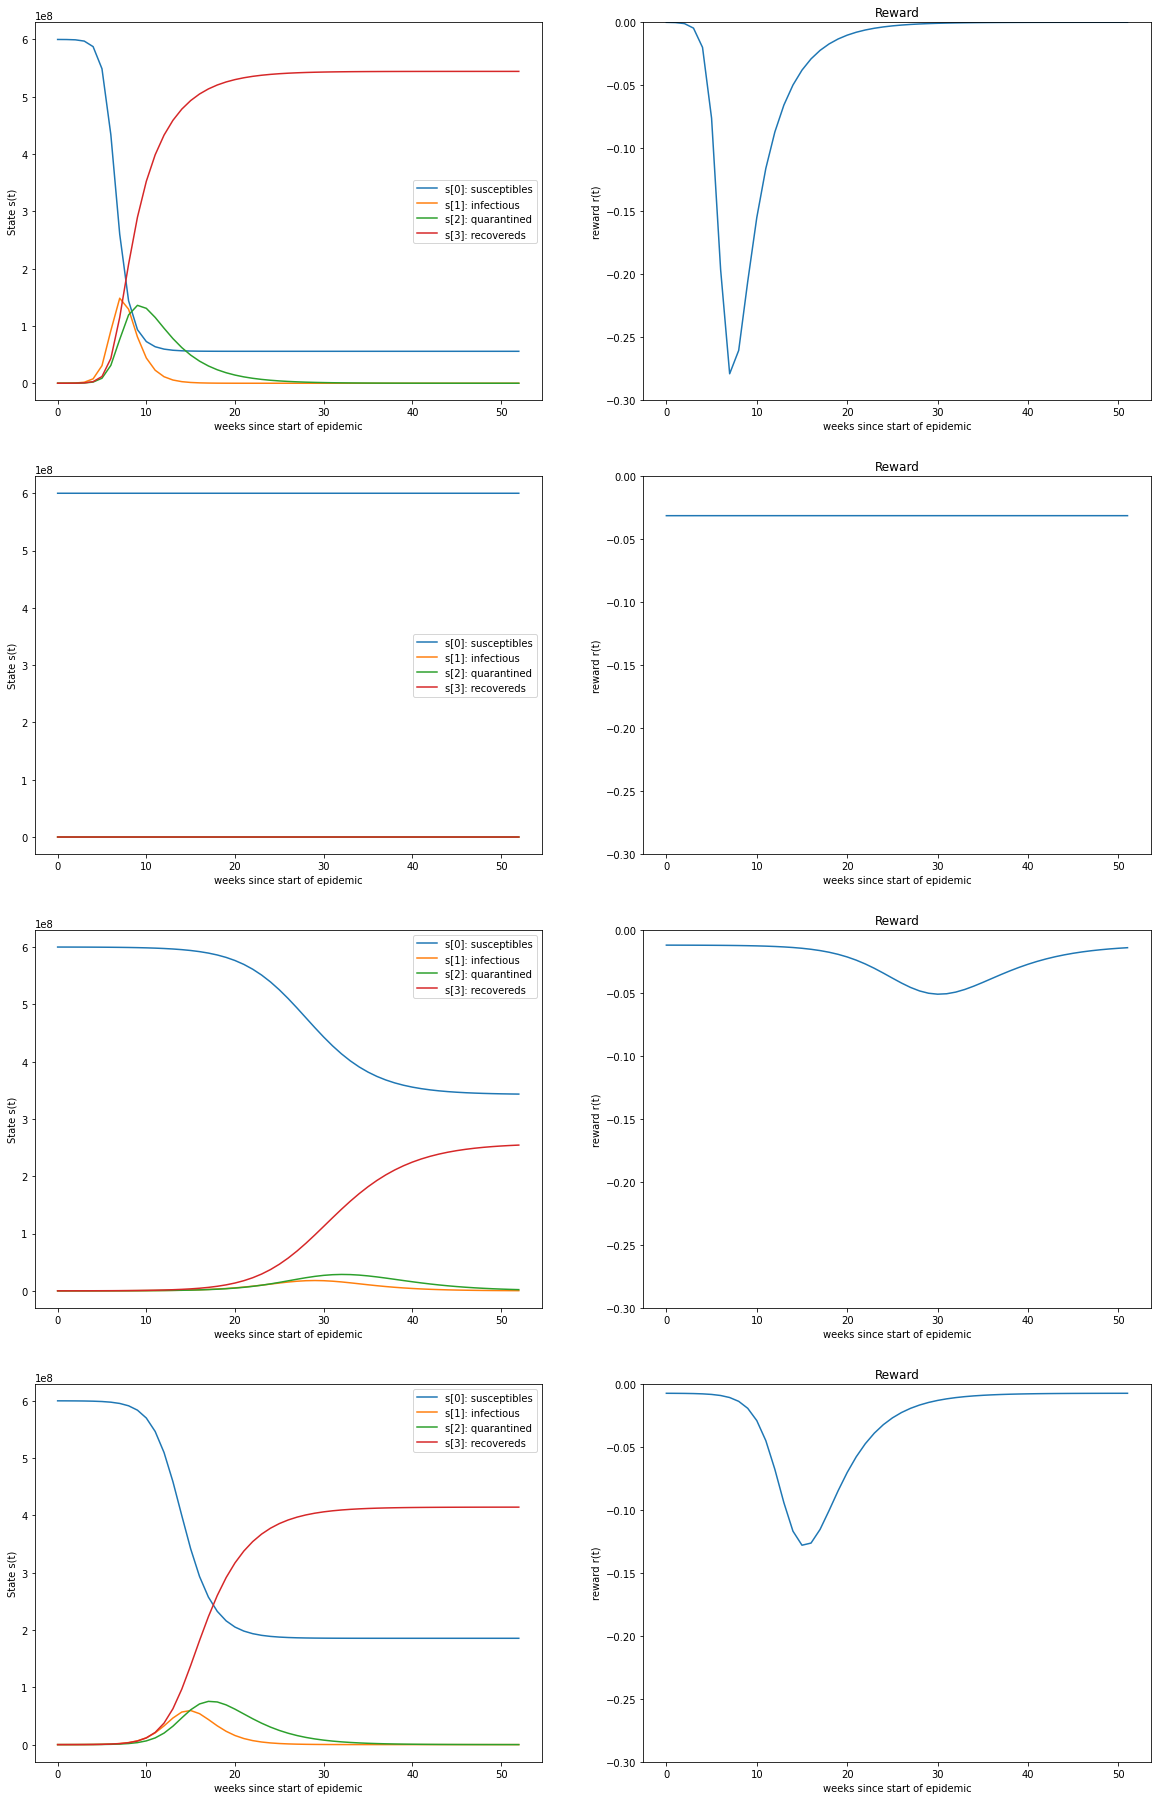

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(20, 32))
labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']

# Disclaimer: it is not guaranteed that the various actions will solve the pandemic problem within the same
# number of moves. Thus, we should assume the states array to be a ragged matrix.
for action in range(env.action_space.n):
    # The first state is always 
    action_states = np.array(states[action])
    action_rewards = np.array(rewards[action])
    main_plot, reward_plot = axes[action]
    
    for i in range(4):
        main_plot.plot(action_states[:,i], label=labels[i]);
    
    main_plot.set_xlabel('weeks since start of epidemic')
    main_plot.set_ylabel('State s(t)')
    main_plot.legend()
    reward_plot.plot(action_rewards);
    reward_plot.set_title('Reward')
    reward_plot.set_xlabel('weeks since start of epidemic')
    reward_plot.set_ylabel('reward r(t)')
    # limit the reward plot ylimit, otherwise John Williamson will be very unhappy
    reward_plot.set_ylim((-0.30, 0))
    
discount_polynomials = np.array([discount ** i for i in range(len(states[0]))])

print('total reward', 
print("Best policy: policy no. ", np.argmax(np.sum(rewards, axis=1)))